FACTORS AFFECTING STUDENTS PERFORMANCE

INTRODUCTION

There are several factors which effect overall performance of students curriculum .This project aims to analyse effect of various such factors like Hours
Studied,Sleep Hours,Question Papers Practiced etc. Comparing these factors with overall performance index of students in dataset Student_Performance. 
dataset source:kaggle.com

PROBLEM STATEMENT

Q1: How does Hours Studied relate to Performance Index?
Q2: Will more Sleep Hours effects Performance Index in positive manner?
Q3: Solving how many Sample Question Papers are optimal for good Performance?
Q4: Is there any relations between Extracurricular Activites and Performance Index?
Q5: Perform both raw analysis and aggregate analysis for the above problems.
    ##note : Hours Studied,Sleep Hours,Sample Question Papers,Extracurricular Activitesare considered as factor 1,2,3,4 respectively.

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
conn=sqlite3.connect(":memory:")
df=pd.read_csv('StudentPerformance.csv')
df.to_sql('Student',conn,index=False)

10000

In [16]:
q1="""select * from Student"""
r1=pd.read_sql(q1,conn)
r1

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


RAW ANALYSIS

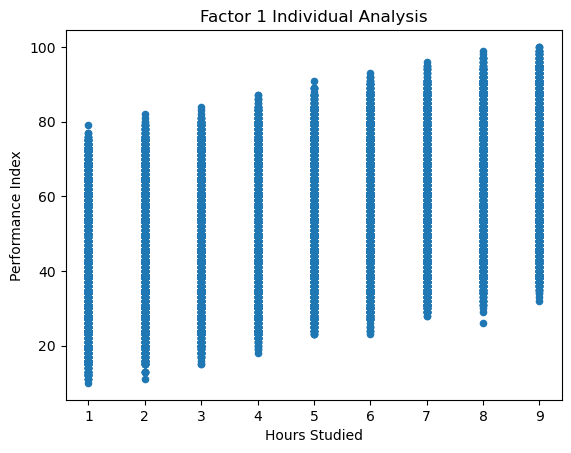

In [11]:
q2="""select ("Hours Studied"),("Performance Index") from Student"""
r2=pd.read_sql(q2,conn)
r2.plot(kind="scatter",x="Hours Studied",y="Performance Index")
plt.title("Factor 1 Individual Analysis")
plt.show()

Conclusion : As Hours Studied increase from range [1,9] the more Hours Studied impacts better Performance for most students.

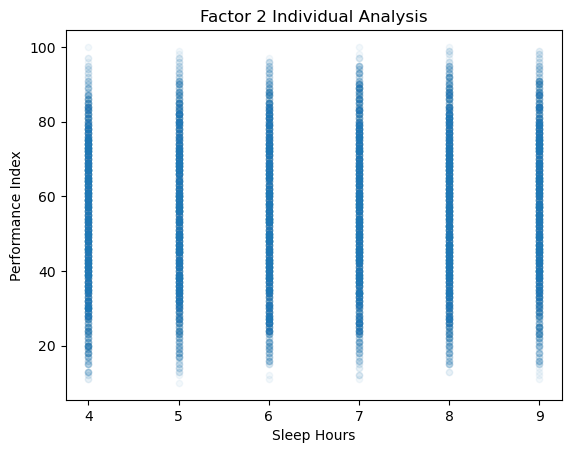

In [84]:
q3="""select ("Sleep Hours"),("Performance Index") from Student"""
r3=pd.read_sql(q3,conn)
r3.plot(kind="scatter",x="Sleep Hours",y="Performance Index",alpha=0.05)
#used function alpha to reduce the intensity of points to understand clearly that where is datas concentrated 
plt.title("Factor 2 Individual Analysis")
plt.show()

Conclusion : Students having Higher Performance are mostly having Sleep Hours in order 8,7,9,6,5,4. 

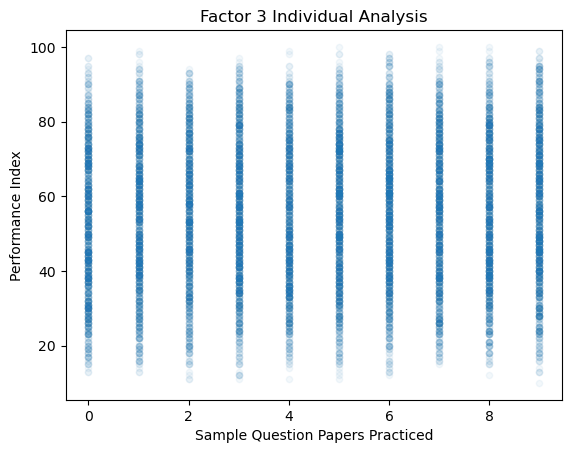

In [83]:
q4="""select ("Sample Question Papers Practiced"),("Performance Index") from Student"""
r4=pd.read_sql(q4,conn)
r4.plot(kind="scatter",x="Sample Question Papers Practiced",y="Performance Index",alpha=0.05)
#used function alpha to reduce the intensity of points to understand clearly that where is datas concentrated 
plt.title("Factor 3 Individual Analysis")
plt.show()

Conclusion : There is Weak relation between Performance Index and Sample Question Papers Practiced.
             Unable to predict practising how many Question Papers are ideal for better performance using this raw datas.

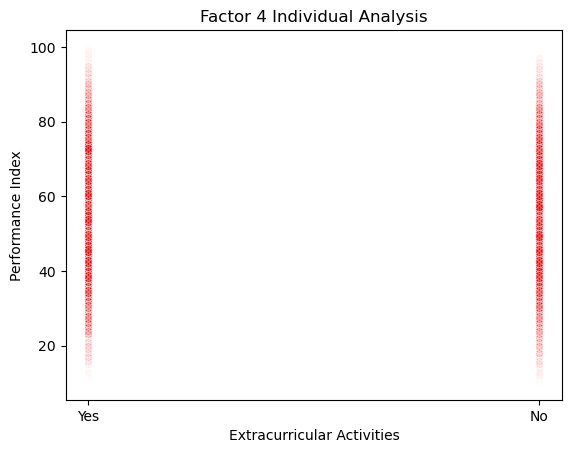

In [82]:
q5="""select ("Extracurricular Activities"),("Performance Index") from Student"""
r5=pd.read_sql(q5,conn)
r5.plot(kind="scatter",x="Extracurricular Activities",y="Performance Index",color='r',alpha=0.005)
#used function alpha to reduce the intensity of points to understand clearly that where is datas concentrated 
plt.title("Factor 4 Individual Analysis")
plt.show()

Conclusion : Raw data analysis says that students perform well in curriculum inorder of their presence or absence in Extra Curricular Activities.
             But somehow students performing Extra Curricular Activities hold an upper hand over the others in Performance Index.

AGGREGATE ANALYSIS

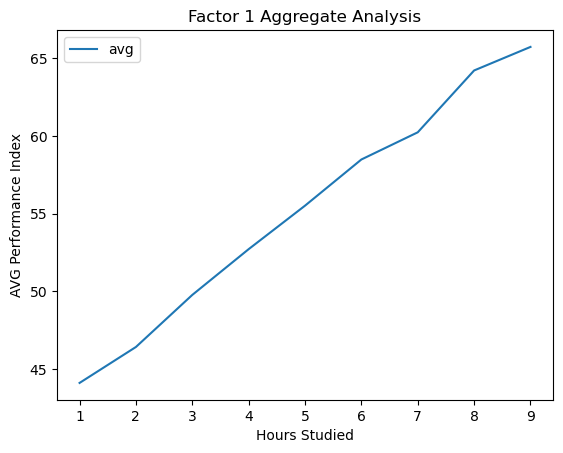

In [6]:
qr1="""select ("hours studied"),avg("performance index") as avg from Student group by ("hours studied")"""
agr1=pd.read_sql(qr1,conn)
agr1.plot(y="avg",x="Hours Studied")
plt.title("Factor 1 Aggregate Analysis")
plt.xlabel("Hours Studied")
plt.ylabel("AVG Performance Index")
plt.show()

Conclusion : As hours studied increase, average performance increases steadily

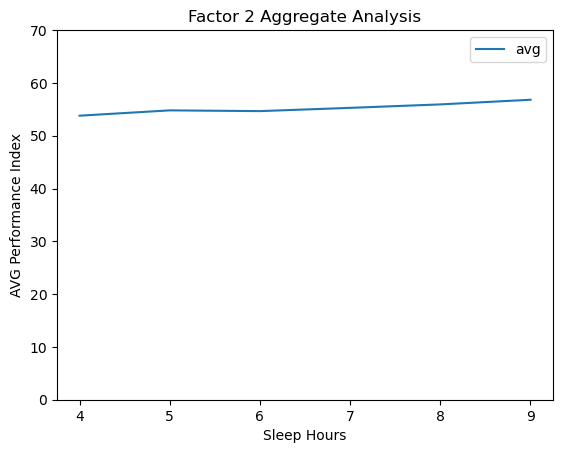

In [10]:
qr2="""select ("sleep hours"),avg("performance index") as avg from Student group by ("sleep hours")"""
agr2=pd.read_sql(qr2,conn)
agr2.plot(y="avg",x="Sleep Hours")
plt.title("Factor 2 Aggregate Analysis")
plt.xlabel("Sleep Hours")
plt.ylabel("AVG Performance Index")
plt.ylim(0,70)
#y axis limit increased for better visibility
plt.show()

Conclusion : Students who sleep 9 hours a day barely outstands well in Performance Index on aggregate analysis followed by 8,7,5 hrs.

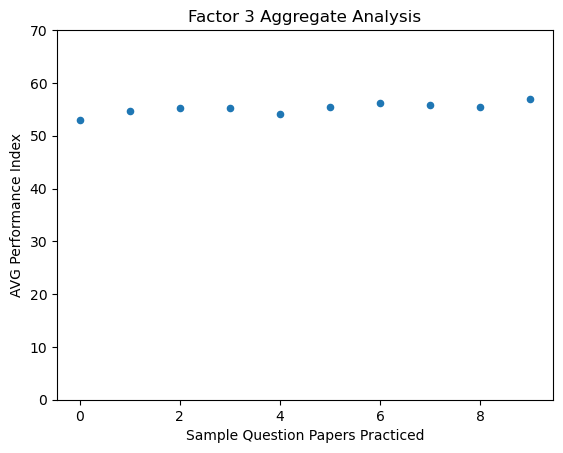

In [8]:
qr3="""select ("Sample Question Papers Practiced"),avg("performance index") as avg from Student group by ("Sample Question Papers Practiced")"""
agr3=pd.read_sql(qr3,conn)
agr3.plot(kind="scatter",y="avg",x="Sample Question Papers Practiced")
plt.title("Factor 3 Aggregate Analysis")
plt.xlabel("Sample Question Papers Practiced")
plt.ylabel("AVG Performance Index")
plt.ylim(0,50+20)
#y axis limit increased for better visibility
plt.show()

Conclusion : Students who practiced 9 and 6 Sample Question Papers performed top in curriculum on aggregate analysis.But there is no direct relations
             found between Performance Index and Sample Question Papers Practiced

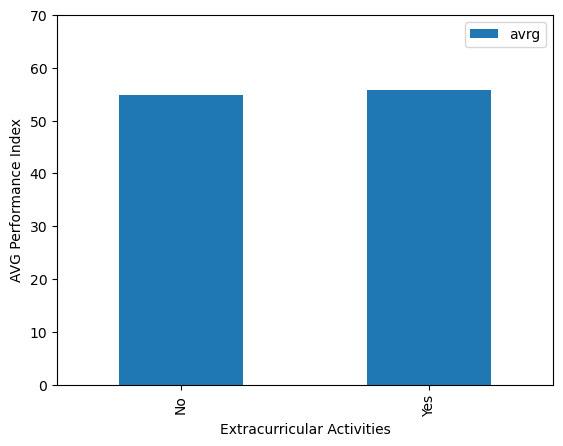

In [48]:
qr4="""select ("Extracurricular Activities"),avg("Performance Index") as avrg from Student group by ("Extracurricular Activities")"""
agr4=pd.read_sql(qr4,conn)
agr4.plot(kind="bar",y="avrg",x="Extracurricular Activities")
plt.xlabel("Extracurricular Activities")
plt.ylabel("AVG Performance Index")
plt.ylim(0,50+20)
#y axis limit increased for better visibility
plt.show()

Conclusion : Aggregate score of students doing Extracurricular Activities is more than those who didn't do.So we can conclude that studnets who do 
             Extracurricular Activities has more likely chance to perform top.

CONCLUSIONS :

  I looked at both raw and aggregated views, and the conclusion is that in raw data analysis higher the Sleep Hours,Hours Studied and participate in
Extra Curricular Activites chance for getting good Performance Index is high.In aggregate analysis as Sleep Hours,Hours Studied goes higher and participate in
Extra Curricular Activites average Performance increases steadily.

LIMITATION :
    Unable to find correlation between Sample Question Practised an Performance Index in both raw data and aggregate data analysis.

                                                              THANK YOU
                                                              ----------